In [35]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
import numpy as np

In [36]:
train = pd.read_csv('/home/tesserxt/AllProjects/jupyter/campusx/content/titanic/test.csv')
test = pd.read_csv('/home/tesserxt/AllProjects/jupyter/campusx/content/titanic/train.csv')

df = pd.concat([train, test])
df = df.reset_index(drop=True)

In [37]:
df = pd.read_csv("/home/tesserxt/AllProjects/jupyter/campusx/content/insurance_data.csv")

# Z-Test

In [38]:
n = 30
bp = df.bloodpressure
pop_std = bp.std()
sample = bp.sample(n)

In [39]:
# Ho: u = 90
# Ha: u > 90

In [40]:
n = 30
alpha = 0.05

zstat, pvalue = ztest(sample, value=90, alternative='larger') # sample std used tdist, n >= 30(for df >= 29 tdist is near normal), ------> so statsmodel.ztest used sample std instead of pop std
print(f"Z-statistic: {zstat}")
print(f"P-value: {pvalue}")

# Compare the p-value with the significance level
if pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Z-statistic: 1.4405219502179525
P-value: 0.07485989221856892
Fail to reject the null hypothesis. There is no significant difference.


In [41]:
zstat = (sample.mean() - 90)/(bp.std()/np.sqrt(n)) # zdist
print(f"zstat: {zstat}")
if zstat > 1.699: # (1.699 is critical value for one tailed alpha = 0.05)
    print('Ho rejected.')
else:
    print('Ho not rejected.')

zstat: 1.75633289918234
Ho rejected.


In [42]:
# Ho: u = 90
# Ha: u > 90
# hypothesis result: pop. mean is greater than 90

# The truth:
u = bp.mean()
u

np.float64(94.15746268656716)

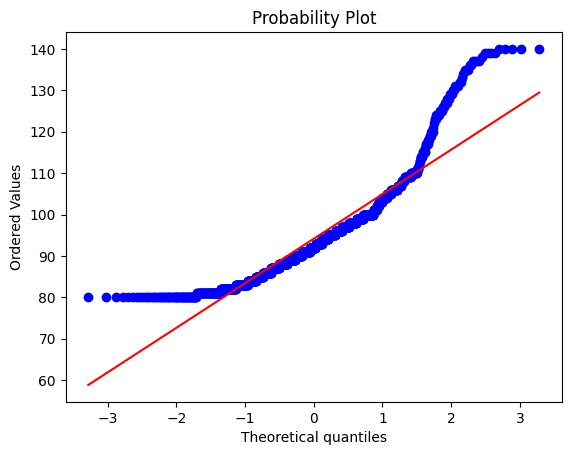

In [43]:

stats.probplot(df.bloodpressure, dist="norm", plot=plt)
plt.show()

# T-Test

## single sample

In [44]:
# 1-stats.t.cdf(tstat, df=29) # pvalue

In [45]:
tstat, pvalue = stats.ttest_1samp(sample, 90, alternative='greater')
print(f"T-statistic: {tstat}")
print(f"P-value: {pvalue}")

T-statistic: 1.4405219502179525
P-value: 0.08021495142664903


## independent two samples

In [46]:
bp_male = df.query("gender == 'male'").bloodpressure
bp_female = df.query("gender == 'female'").bloodpressure

bp_male_sample = bp_male.sample(30)
bp_female_sample = bp_female.sample(30)

# Ho: population mean of females_bp = population mean of males_bp
# Ha: population mean of females_bp != population mean of males_bp

In [47]:
stats.levene(bp_male_sample, bp_female_sample) # population variance of both independent samples is almost similar

LeveneResult(statistic=np.float64(0.8407064253162789), pvalue=np.float64(0.36299174814051294))

In [48]:
tstat, pvalue = stats.ttest_ind(bp_female_sample, bp_male_sample)
print(f"T-statistic: {tstat}")
print(f"P-value: {pvalue}")


if pvalue < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

T-statistic: -2.108403771883184
P-value: 0.03932652154819124
Reject the null hypothesis.


In [49]:
# Ho: population mean of females_bp = population mean of males_bp
# Ha: population mean of females_bp != population mean of males_bp
# Result: Ho wins

# The truth
print(bp_male.mean(), bp_female.mean())

94.29793510324484 94.01359516616314


## Dependent two sample

In [50]:
before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [51]:
diff = after - before
diff

array([-2,  1,  6, -1,  3, -2,  1,  1, -1,  0,  1, -3, -2,  2, -3])

In [52]:
tstat = diff.mean()/(diff.std()/np.sqrt(before.shape[0]))
print(f"T-statistic: {tstat}")
pvalue = stats.t.cdf(tstat, df=before.shape[0] - 1)
print(f"pvalue: {pvalue}")

T-statistic: 0.10850778933039285
pvalue: 0.542433629038992


In [53]:
# Ho: before == after
# Ha: before > after
# Result: Ho wins - pvalue > 0.05

# Final truth
print(before.mean(), after.mean())

80.6 80.66666666666667


In [54]:
stats.ttest_rel(before, after, alternative='greater')

TtestResult(statistic=np.float64(-0.10482848367219182), pvalue=np.float64(0.5410005146857456), df=np.int64(14))

# $Chi^2$ Test

In [55]:
observed_sample = df.diabetic.sample(50).value_counts()
observed_sample

diabetic
Yes    26
No     24
Name: count, dtype: int64

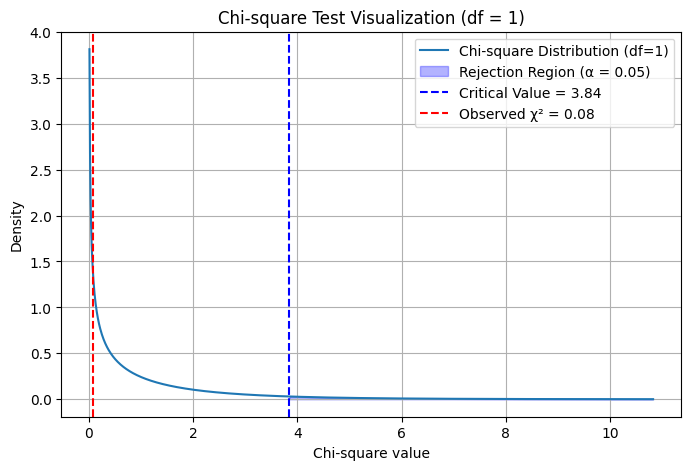

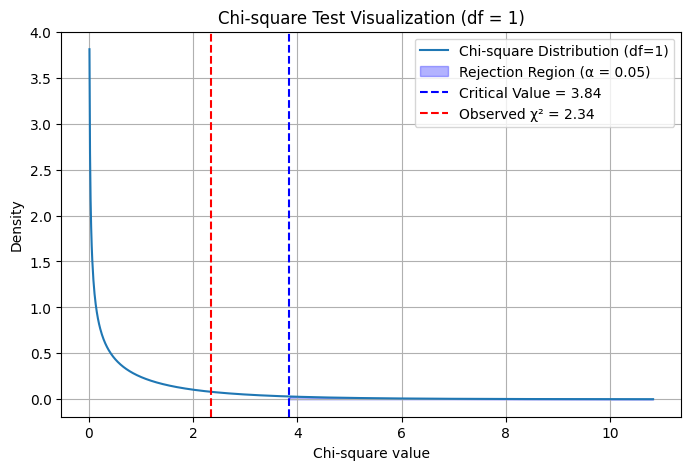

(np.float64(2.3402985074626868), np.float64(0.12606539453129462), 1)

In [56]:
from utils import chi2plot
import seaborn as sns

chi2plot(observed_sample)
chi2plot(df.diabetic.value_counts())


In [23]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## goodness of fit

In [24]:
obs_region = df.region.sample(50).value_counts()
obs_region

region
southeast    18
southwest    12
northwest    12
northeast     8
Name: count, dtype: int64

In [25]:
df.region.value_counts()

region
southeast    443
northwest    349
southwest    314
northeast    231
Name: count, dtype: int64

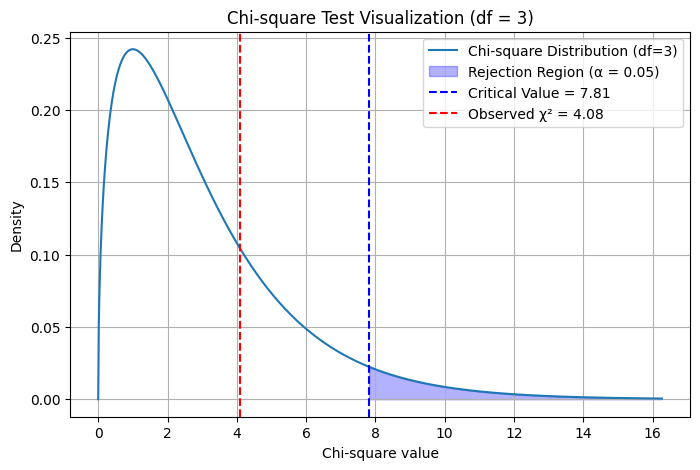

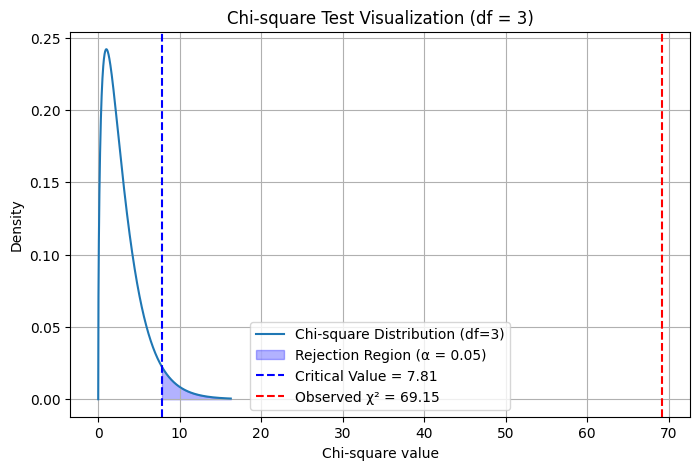

(np.float64(69.15407629020194), np.float64(6.477110609791794e-15), 3)

In [57]:
chi2plot(obs_region) #samplegg
chi2plot(df.region.value_counts()) #population

In [27]:
from scipy.stats import norm

categories = [1, 2, 3, ]
observed = [216, 184, 491]

# Convert categories to midpoints if needed; here using as-is
mu, std = norm.fit(categories, floc=0)  # or fit to actual data points if available
probs = norm.pdf(categories, mu, std)
probs /= probs.sum()  # normalize to sum to 1
expected = [sum(observed) * p for p in probs]
expected

[np.float64(414.5178445420207),
 np.float64(300.5720381858064),
 np.float64(175.91011727217287)]

## test for Independence

In [28]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [29]:
ctab = pd.crosstab(df.region, df.gender)
ctab

gender,female,male
region,,
northeast,112,119
northwest,164,185
southeast,224,219
southwest,162,152


In [30]:
print(stats.chi2_contingency(ctab))

Chi2ContingencyResult(statistic=np.float64(1.7243969076432113), pvalue=np.float64(0.6315234955336224), dof=3, expected_freq=array([[114.37696335, 116.62303665],
       [172.80329095, 176.19670905],
       [219.34629768, 223.65370232],
       [155.47344802, 158.52655198]]))


### khan academy example

In [58]:
df = pd.DataFrame({
    'sick_or_not': np.random.choice(['not_sick', 'sick'], 380, p=[0.79, 0.21]),
    'medicine': np.random.choice(['herb1', 'herb2', 'placebo'], 380, p=[.31, .38, .31])
})
pd.crosstab(df.sick_or_not, df.medicine, margins=True)

medicine,herb1,herb2,placebo,All
sick_or_not,,,,
not_sick,91,111,96,298
sick,31,26,25,82
All,122,137,121,380


In [ ]:
#  Khan academy example

df = pd.DataFrame(
        [[100, 110, 90], [20, 30, 30]],
        columns = ['herb1', 'herb2', 'placebo'],
        index = ['not_sick', 'sick']
    )
df

df["All"] = df.sum(axis=1)
df.loc["All"] = df.sum(axis=0)
df

In [ ]:
def chi2plot(f_obs, f_exp=None, alpha=0.05, contingency=False):
    
    chistat, pvalue, df, expected = [None]*4
    
    
    if contingency:
        chistat, pvalue, df, expected = stats.chi2_contingency(f_obs)
    else:
        chistat, pvalue = stats.chisquare(f_obs, f_exp)
        df = f_obs.index.size - 1
    
    critical_value = stats.chi2.ppf(1 - alpha, df)
    
    print(chistat, pvalue, df, expected)
    end = stats.chi2.ppf(0.999,df)
    x = np.linspace(0, end, 1000)
    y = stats.chi2.pdf(x, df)

    plt.figure(figsize=(8, 5))
    sns.lineplot(x=x, y=y, label=f'Chi-square Distribution (df={df})')
    plt.fill_between(x, 0, y, where=(x >= critical_value), color='blue', alpha=0.3, label=f'Rejection Region (α = {alpha})')
    plt.axvline(critical_value, color='blue', linestyle='--', label=f'Critical Value = {critical_value:.2f}')
    plt.axvline(chistat, color='red', linestyle='--', label=f'Observed χ² = {chistat:.2f}')

    plt.title(f"Chi-square Test Visualization (df = {df})")
    plt.xlabel("Chi-square value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return chistat, pvalue, df

In [61]:
chi2plot(df)

ValueError: could not convert string to float: 'not_sick'

In [ ]:

stats.chi2_contingency(df)

Chi2ContingencyResult(statistic=np.float64(54.46136403279261), pvalue=np.float64(1.6846626207778443e-10), dof=5, expected_freq=array([[95.78947368, 13.26315789, 15.47368421, 14.        , 14.73684211,
        14.73684211],
       [34.21052632,  4.73684211,  5.52631579,  5.        ,  5.26315789,
         5.26315789]]))

In [ ]:
df = pd.DataFrame(
        [[120, 8, 11, 9, 10, 10], [10, 10, 10, 10, 10, 10]],
        columns = [1,2,3,4,5,6],
        index = ['observed', 'expected']
    )
df


,1,2,3,4,5,6
observed,120,8,11,9,10,10
expected,10,10,10,10,10,10


In [ ]:
stats.chisquare(df)

Power_divergenceResult(statistic=array([9.30769231e+01, 2.22222222e-01, 4.76190476e-02, 5.26315789e-02,
       0.00000000e+00, 0.00000000e+00]), pvalue=array([5.03008339e-22, 6.37351888e-01, 8.27259347e-01, 8.18545808e-01,
       1.00000000e+00, 1.00000000e+00]))